In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Data2/target_gwanak.csv')
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,점포수,총매출액,점포매출액
0,2014,1,A,골목상권,11620,관악구,11620525,보라매동,1000804,당곡길,71,35082548052,4.941204e+08
1,2014,1,A,골목상권,11620,관악구,11620525,보라매동,1000811,봉천로13길,1,144068088,1.440681e+08
2,2014,1,A,골목상권,11620,관악구,11620545,청림동,1000783,관악로30길,36,6441883635,1.789412e+08
3,2014,1,A,골목상권,11620,관악구,11620545,청림동,1000835,청림3길,20,2556825805,1.278413e+08
4,2014,1,A,골목상권,11620,관악구,11620565,성현동,1000786,구암길,15,486805533,3.245370e+07


### 집객시설 데이터를 넣어봐요

In [3]:
building=pd.read_csv('./Raw/서울시_우리마을가게_상권분석서비스(구_상권_집객시설).csv',encoding='euc-kr')

In [4]:
building.columns

Index(['기준_년_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '집객시설_수',
       '관공서_수', '은행_수', '종합병원_수', '일반_병원_수', '약국_수', '유치원_수', '초등학교_수',
       '중학교_수', '고등학교_수', '대학교_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '공항_수', '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수', '기준_분기_코드'],
      dtype='object')

In [5]:
building['기준_년_코드'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015])

In [6]:
# 15년도부터 21년도 까지 데이터가 있다.
data.shape

(1984, 13)

In [7]:
data=pd.merge(data,building,on=['기준_년_코드', '기준_분기_코드','상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'],how='left')

In [8]:
data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '행정동_코드_명', '상권_코드', '상권_코드_명', '점포수', '총매출액', '점포매출액',
       '집객시설_수', '관공서_수', '은행_수', '종합병원_수', '일반_병원_수', '약국_수', '유치원_수',
       '초등학교_수', '중학교_수', '고등학교_수', '대학교_수', '백화점_수', '슈퍼마켓_수', '극장_수',
       '숙박_시설_수', '공항_수', '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수'],
      dtype='object')

In [9]:
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,...,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수
0,2014,1,A,골목상권,11620,관악구,11620525,보라매동,1000804,당곡길,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,1,A,골목상권,11620,관악구,11620525,보라매동,1000811,봉천로13길,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,1,A,골목상권,11620,관악구,11620545,청림동,1000783,관악로30길,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,1,A,골목상권,11620,관악구,11620545,청림동,1000835,청림3길,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,1,A,골목상권,11620,관악구,11620565,성현동,1000786,구암길,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.isnull().sum()

기준_년_코드          0
기준_분기_코드         0
상권_구분_코드         0
상권_구분_코드_명       0
시군구코드            0
시군구명             0
행정동_코드           0
행정동_코드_명         0
상권_코드            0
상권_코드_명          0
점포수              0
총매출액             0
점포매출액            0
집객시설_수         277
관공서_수         1406
은행_수          1677
종합병원_수        1956
일반_병원_수       1900
약국_수           802
유치원_수         1672
초등학교_수        1896
중학교_수         1956
고등학교_수        1980
대학교_수         1975
백화점_수         1984
슈퍼마켓_수        1918
극장_수          1933
숙박_시설_수       1516
공항_수          1984
철도_역_수        1984
버스_터미널_수      1984
지하철_역_수       1956
버스_정거장_수       679
dtype: int64

In [11]:
data.isnull().sum().sum()

33435

In [12]:
# na 처리
data=data.fillna(0)

In [13]:
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,...,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수
0,2014,1,A,골목상권,11620,관악구,11620525,보라매동,1000804,당곡길,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,1,A,골목상권,11620,관악구,11620525,보라매동,1000811,봉천로13길,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014,1,A,골목상권,11620,관악구,11620545,청림동,1000783,관악로30길,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014,1,A,골목상권,11620,관악구,11620545,청림동,1000835,청림3길,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014,1,A,골목상권,11620,관악구,11620565,성현동,1000786,구암길,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
data.isnull().any()

기준_년_코드       False
기준_분기_코드      False
상권_구분_코드      False
상권_구분_코드_명    False
시군구코드         False
시군구명          False
행정동_코드        False
행정동_코드_명      False
상권_코드         False
상권_코드_명       False
점포수           False
총매출액          False
점포매출액         False
집객시설_수        False
관공서_수         False
은행_수          False
종합병원_수        False
일반_병원_수       False
약국_수          False
유치원_수         False
초등학교_수        False
중학교_수         False
고등학교_수        False
대학교_수         False
백화점_수         False
슈퍼마켓_수        False
극장_수          False
숙박_시설_수       False
공항_수          False
철도_역_수        False
버스_터미널_수      False
지하철_역_수       False
버스_정거장_수      False
dtype: bool

### 일단 상관계수 찍어볼까요??

In [15]:
# 찍기 위해 일단 위치좀 바꾸자
conn=data.iloc[:,:10]
target=data.iloc[:,12:13]
feature1=data.iloc[:,10:11]
feature2=data.iloc[:,13:]

In [16]:
data=pd.concat([conn,target,feature1,feature2],axis=1)

In [17]:
data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '행정동_코드_명', '상권_코드', '상권_코드_명', '점포매출액', '점포수', '집객시설_수',
       '관공서_수', '은행_수', '종합병원_수', '일반_병원_수', '약국_수', '유치원_수', '초등학교_수',
       '중학교_수', '고등학교_수', '대학교_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '공항_수', '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수'],
      dtype='object')

In [18]:
del data['백화점_수']
del data['공항_수']
del data['철도_역_수']
del data['버스_터미널_수']

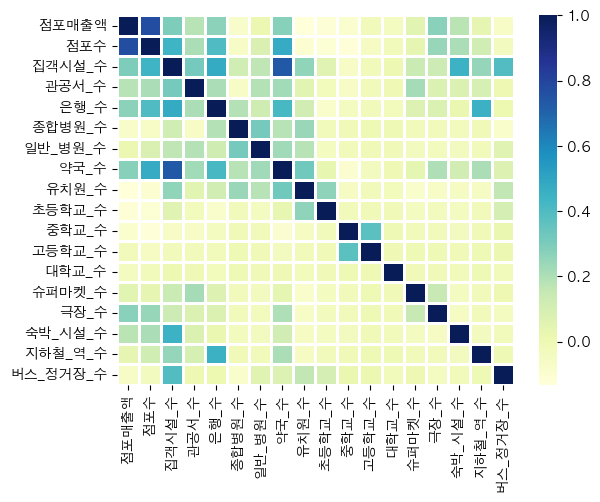

In [19]:
table = data.iloc[:,10:].corr()

sns.heatmap(
	table,
	cmap='YlGnBu',
	linewidth=2,
	cbar=True
)

plt.show()

### 매출과 어떤 시설물이 관계 있을까??
- 일단 인구수를 많이 대동할 수 있는 부분이 관여를 많이 할 것이다. <br><br>
- 교통이 편리해야 많이 오지 않을까?? 라는 생갈을 한다. <br><br>

### 알아보자
1) 관공서 , 은행

In [20]:
data.iloc[:,12:]

,집객시설_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,초등학교_수,중학교_수,고등학교_수,대학교_수,슈퍼마켓_수,극장_수,숙박_시설_수,지하철_역_수,버스_정거장_수
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980,8.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981,11.0,0.0,1.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1982,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0


In [21]:
# for name in data.columns[12:]:
#     sns.swarmplot(
#         data=data,
#         x=name,
#         y='점포매출액'
#     )

#     plt.title(f'{name} 과 매출액 산점도')

#     plt.show()

In [22]:
data['집객시설수검증']=data.iloc[:,13:].apply(np.sum,axis=1)

In [23]:
# 같은게 219개 밖에 없다.
# 이말은 뭐다. 개똥쓰레기 데이터라는 소리다. 씨발
sum(data['집객시설_수'] == data['집객시설수검증'])

432

### 이거 못쓴다. 버리자

### 상권 배후지 데이터 한번 갔다 쓰기 전에 일단 아파트 먼저 조진다.

In [24]:
data['상권_코드_명'].value_counts()

당곡길          32
대학길          32
관천로15길       32
난곡로74길       32
남부순환로151길    32
             ..
남현길          32
승방길          32
신림로48길       32
신원로3길        32
법원단지길        32
Name: 상권_코드_명, Length: 62, dtype: int64

In [25]:
data['행정동_코드_명'].value_counts()

난곡동     160
신사동     160
청룡동     160
미성동     128
대학동     128
남현동     128
신림동     128
서림동     128
행운동      96
낙성대동     96
삼성동      96
인헌동      96
조원동      96
보라매동     64
청림동      64
중앙동      64
성현동      64
신원동      32
난향동      32
은천동      32
서원동      32
Name: 행정동_코드_명, dtype: int64

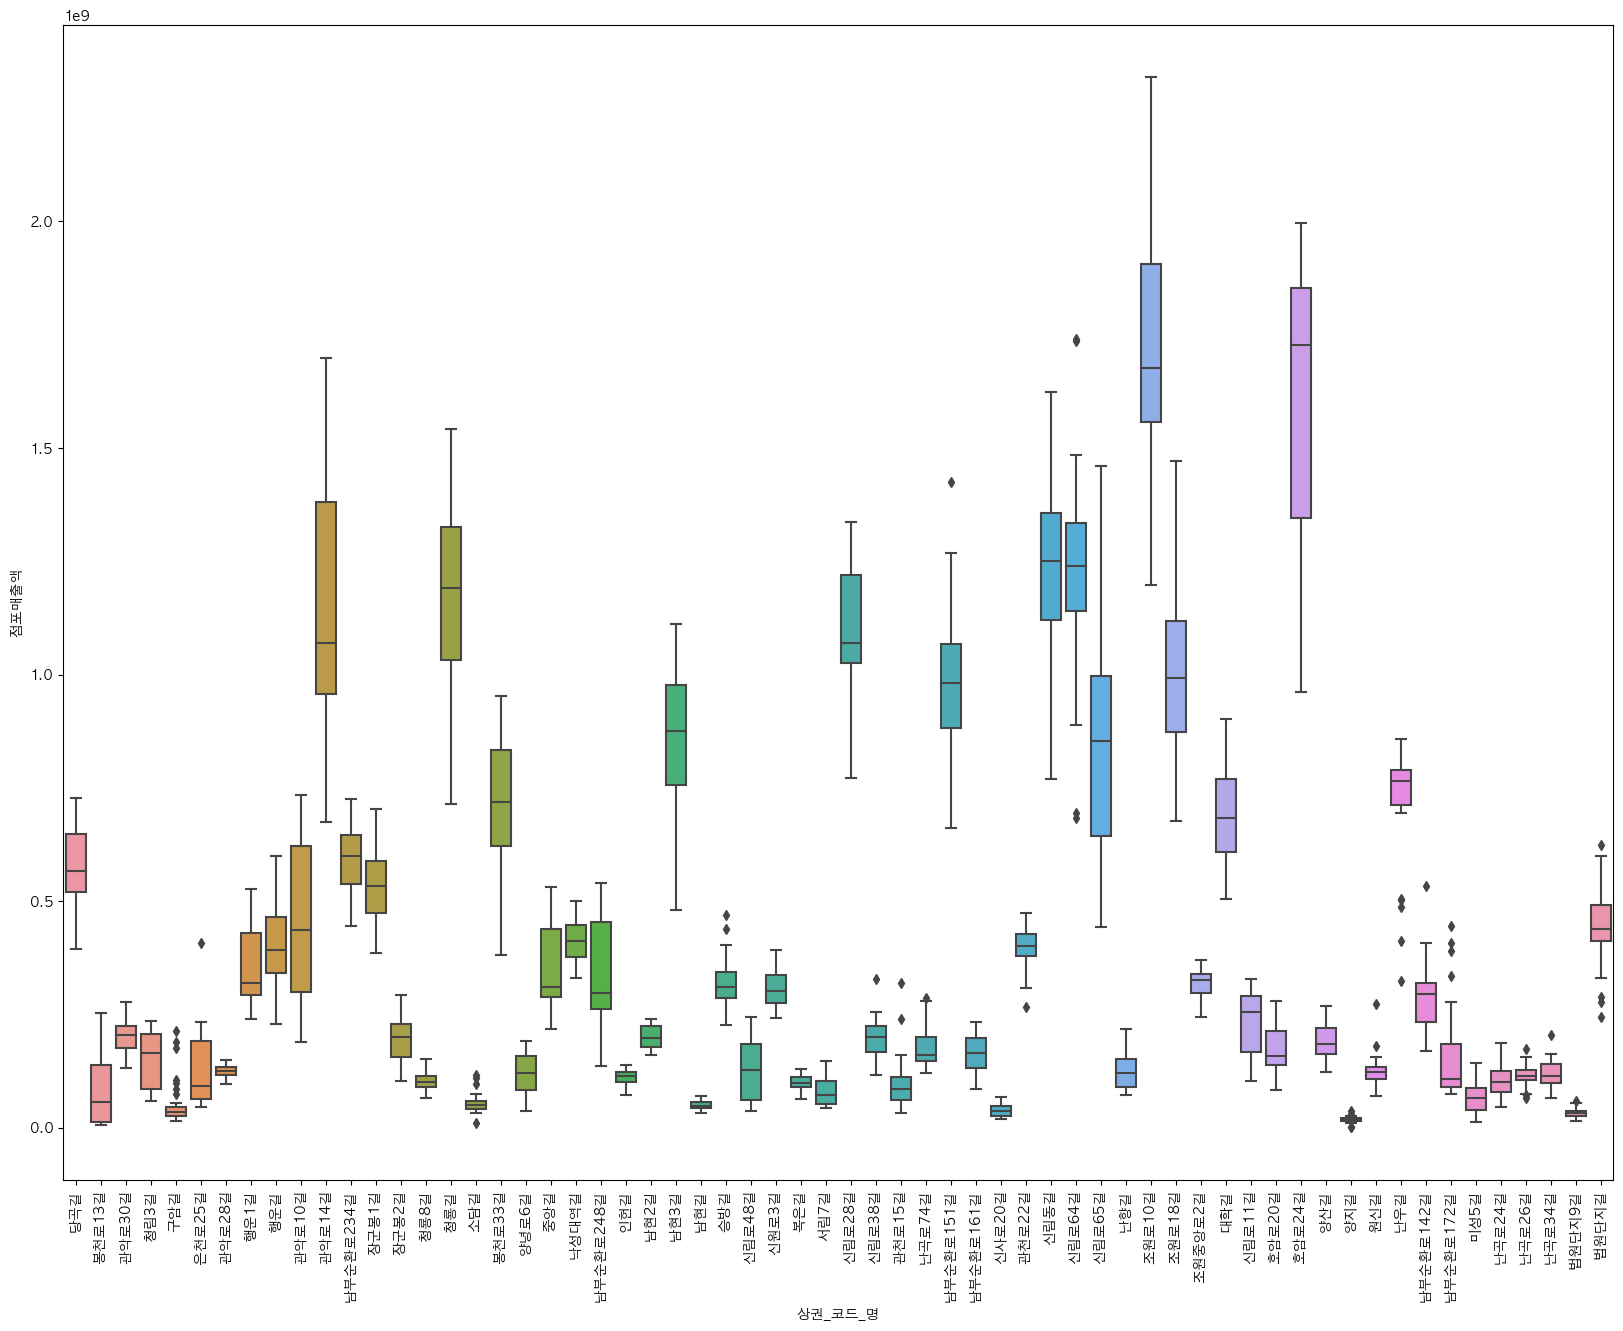

In [26]:
plt.figure(figsize=(20,15))

sns.boxplot(
    y='점포매출액',
    x='상권_코드_명',
    data=data
)

plt.xticks(
    rotation=90
)


plt.show()

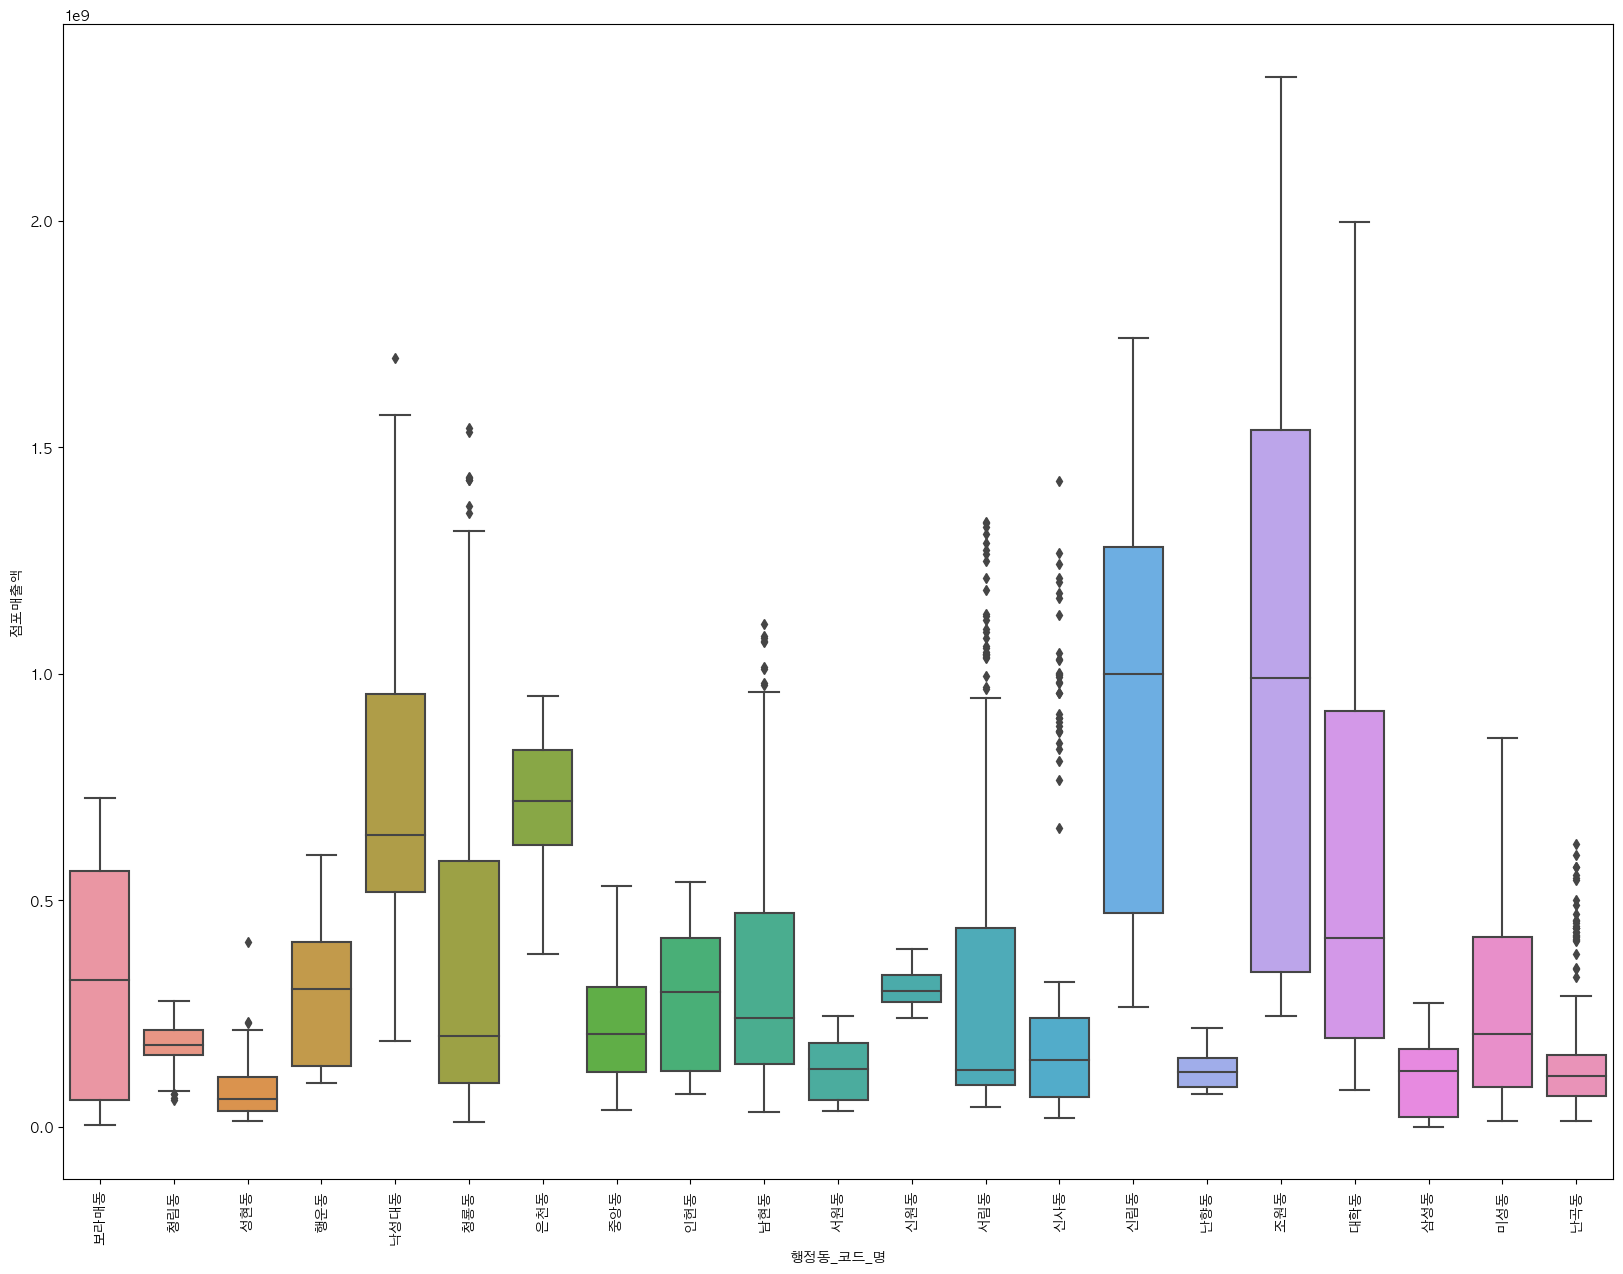

In [27]:
plt.figure(figsize=(20,15))

sns.boxplot(
    y='점포매출액',
    x='행정동_코드_명',
    data=data
)

plt.xticks(
    rotation=90
)


plt.show()

In [28]:
#신사동에 이상치로 판단되는 부분이 있는데 이거 확인해보기
test=data[data['행정동_코드_명']=='신사동'].sort_values(by='점포매출액',ascending=False)
test.iloc[25:40,8:15]


,상권_코드,상권_코드_명,점포매출액,점포수,집객시설_수,관공서_수,은행_수
1957,1000796,남부순환로151길,8.730162e+08,80,16.0,1.0,1.0
1647,1000796,남부순환로151길,8.723287e+08,74,22.0,1.0,1.0
965,1000796,남부순환로151길,8.470502e+08,86,21.0,1.0,1.0
1833,1000796,남부순환로151길,8.336040e+08,79,16.0,1.0,1.0
1709,1000796,남부순환로151길,8.067097e+08,77,22.0,1.0,1.0
1895,1000796,남부순환로151길,7.657181e+08,76,16.0,1.0,1.0
1771,1000796,남부순환로151길,6.605164e+08,75,22.0,1.0,1.0
1893,1000784,관천로15길,3.199570e+08,5,5.0,0.0,0.0
840,1000792,난곡로74길,2.851307e+08,34,5.0,0.0,0.0
778,1000792,난곡로74길,2.786154e+08,33,5.0,0.0,0.0


### 남부순환로151길 상권에서 다 높은 매출액을 보여주었으므로 이거는 특정 상권의 특징이라고도 할 수 있을 것 같다.

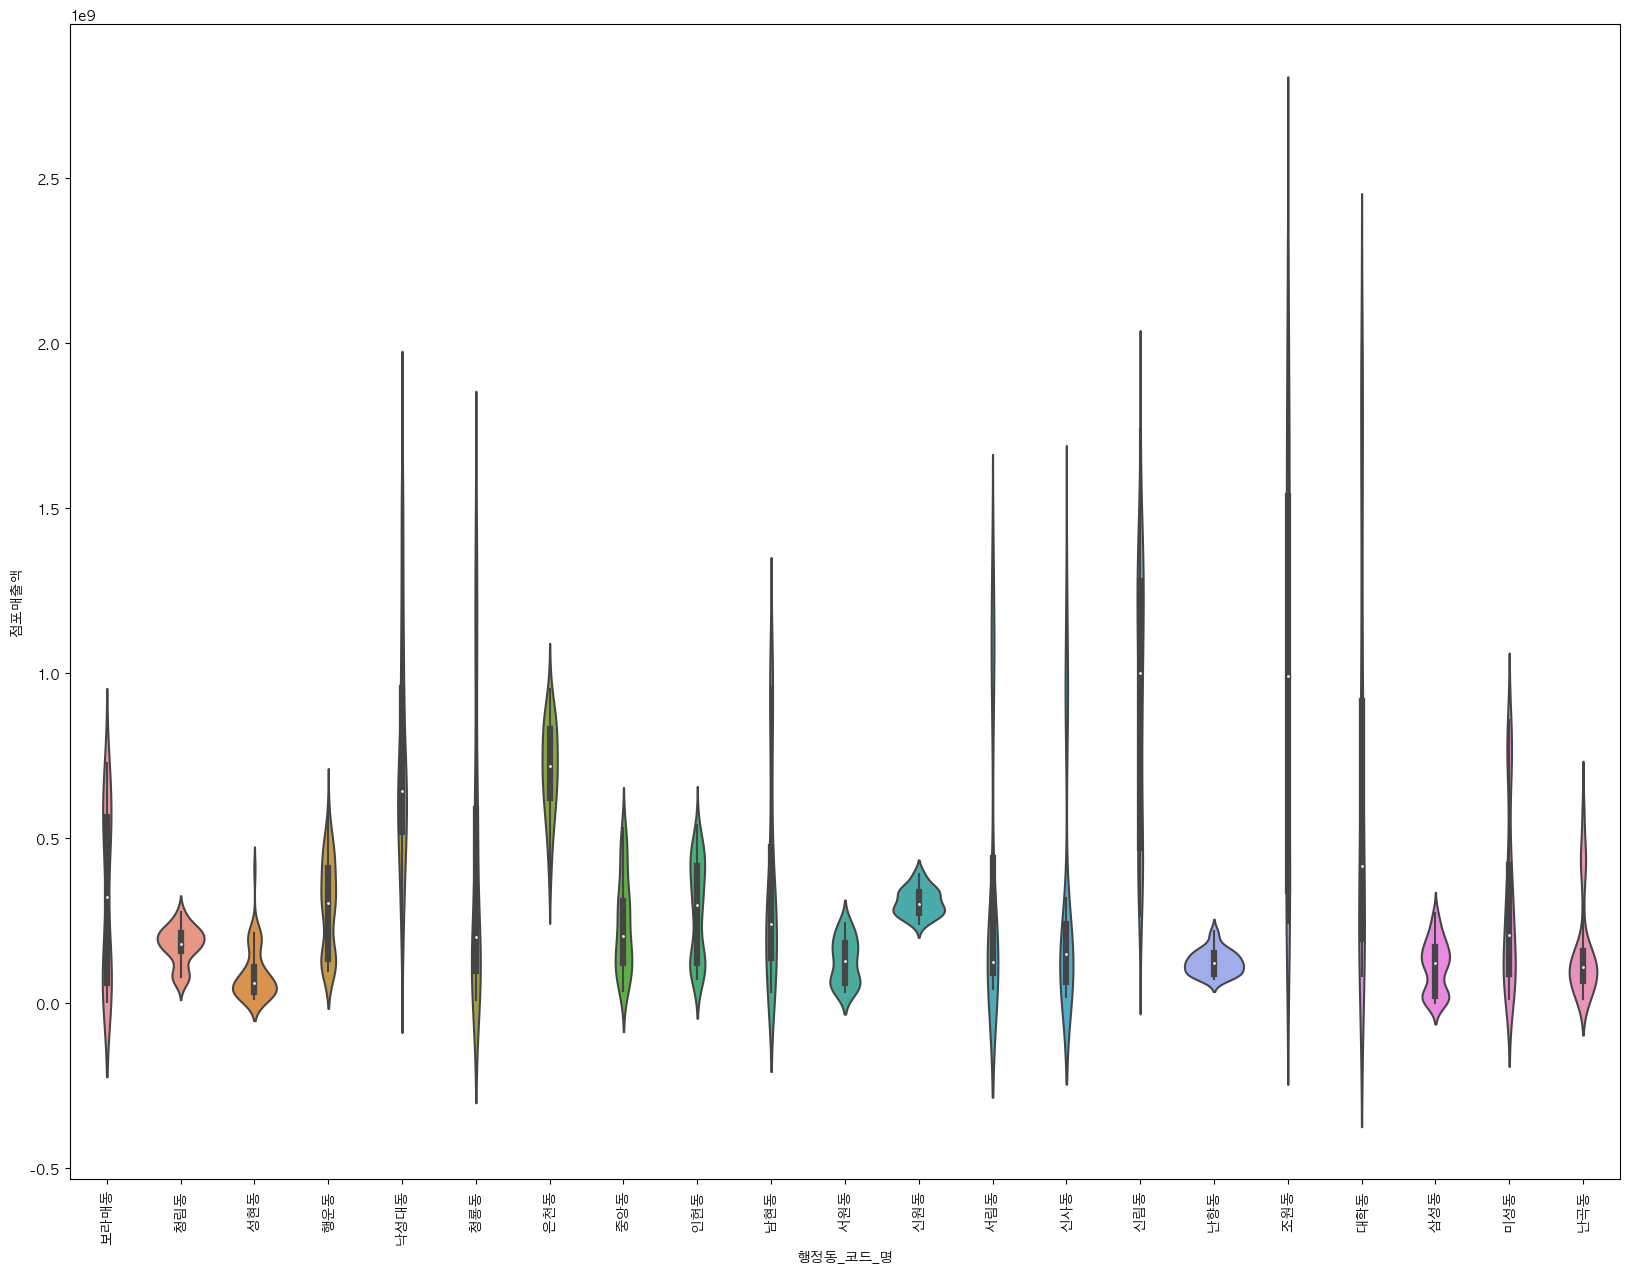

In [29]:
plt.figure(figsize=(20,15))

sns.violinplot(
    y='점포매출액',
    x='행정동_코드_명',
    data=data
)

plt.xticks(
    rotation=90
)


plt.show()

In [30]:
data2=pd.get_dummies(
    data=data,
    columns=['행정동_코드_명'],
    prefix='행정동_코드_명'
)

In [31]:
data2.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '상권_코드', '상권_코드_명', '점포매출액', '점포수', '집객시설_수', '관공서_수', '은행_수',
       '종합병원_수', '일반_병원_수', '약국_수', '유치원_수', '초등학교_수', '중학교_수', '고등학교_수',
       '대학교_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '지하철_역_수', '버스_정거장_수', '집객시설수검증',
       '행정동_코드_명_낙성대동', '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동',
       '행정동_코드_명_대학동', '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동',
       '행정동_코드_명_서림동', '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동',
       '행정동_코드_명_신사동', '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동',
       '행정동_코드_명_조원동', '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동',
       '행정동_코드_명_행운동'],
      dtype='object')

In [32]:
feature = data2[['행정동_코드_명_낙성대동', '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동',
       '행정동_코드_명_대학동', '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동',
       '행정동_코드_명_서림동', '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동',
       '행정동_코드_명_신사동', '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동',
       '행정동_코드_명_조원동', '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동',
       '행정동_코드_명_행운동','점포수']]
target = data2['점포매출액']

In [33]:
from module.default import basic
basic(feature,target)

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
train :  0.9016670521873618
test :  0.8421747194439716
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
train :  0.7672133131150705
test :  0.7595890039080807
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
train :  0.7671597769244677
test :  0.7596231419457402
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
train :  0.7672133131150671
test :  0.7595890041869529
--------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
train :  0.9564399723077941
test :  0.9042979184815575
--------------------------------------------------


### 선형회귀 오차율 확인하기

In [34]:
feature = feature.to_numpy()
target = target.to_numpy()

In [35]:
feature.shape

(1984, 22)

In [36]:
target.shape

(1984,)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr = LinearRegression()
train_input , test_input , train_target , test_target = train_test_split(feature,target,test_size=0.2)
lr.fit(train_input,train_target)
predict = lr.predict(test_input)
lr.score(test_input,test_target)

0.795406565190369

In [38]:
# mse 오차보기
from sklearn.metrics import mean_squared_error 
mean_squared_error(predict,test_target)

4.033692236625549e+16

In [39]:
# mae
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predict,test_target)

141264753.18374914

In [40]:
# rmse 
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(predict,test_target)
np.sqrt(MSE) 

200840539.64838743

In [41]:
# 위의 오차는 값에 대한 것이라면 이것은 값과 분산에 관해서 오차를 내는 것 1에 가까울 수록 좋다.
from sklearn.metrics import r2_score
r2_score(predict,test_target)

0.7218583024842951

In [42]:
# 오류 측정하기
from module.error import measure_error
test=measure_error('lr',predict,test_target)
test2=measure_error('lr',predict,test_target)


In [43]:
# 모델 별로 오차율 붙여서 보기
test=pd.DataFrame([test])
test2=pd.DataFrame([test2])

pd.concat([test,test2],axis=0)

,model_name,MSE,MAE,RMSE,R2Score
0,lr,4.033692e+16,1.412648e+08,2.008405e+08,0.721858
0,lr,4.033692e+16,1.412648e+08,2.008405e+08,0.721858


In [47]:
np.log10(test['MAE'])

0    8.150034
Name: MAE, dtype: float64

In [48]:
np.log10(np.mean(data['점포매출액']))

8.607739182864034

In [49]:
10**0.5

3.1622776601683795